In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style('darkgrid')
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
df0 = pd.read_csv('df_missing_values.csv')

In [4]:
df = df0.copy()

In [5]:
df.describe()

,age,price,km,hp_kw,previous_owners,displacement_in_cc,cylinders,weight,nr_of_doors,nr_of_seats,gears,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km)
count,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000,14819.000000
mean,2.385114,18108.070180,32013.870964,88.309063,0.985492,1425.650044,3.801876,1342.922464,4.663203,4.949659,5.940752,4.827161,5.798961,4.205830
std,1.116242,7427.593374,36841.983319,26.705990,0.332059,335.832265,0.407971,205.912684,0.638659,0.465031,0.809745,1.265490,1.877161,1.115658
min,1.000000,13.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.200000,2.000000,2.000000
25%,1.000000,12900.000000,2606.000000,66.000000,1.000000,1229.000000,4.000000,1163.000000,4.000000,5.000000,5.000000,4.000000,4.600000,3.700000
50%,2.000000,16950.000000,20413.000000,85.000000,1.000000,1461.000000,4.000000,1308.000000,5.000000,5.000000,6.000000,4.800000,5.700000,4.200000
75%,3.000000,21900.000000,45914.000000,101.000000,1.000000,1598.000000,4.000000,1487.000000,5.000000,5.000000,6.000000,5.400000,6.800000,4.500000
max,4.000000,74600.000000,317000.000000,294.000000,4.000000,16000.000000,8.000000,2471.000000,7.000000,7.000000,50.000000,55.000000,66.000000,44.000000


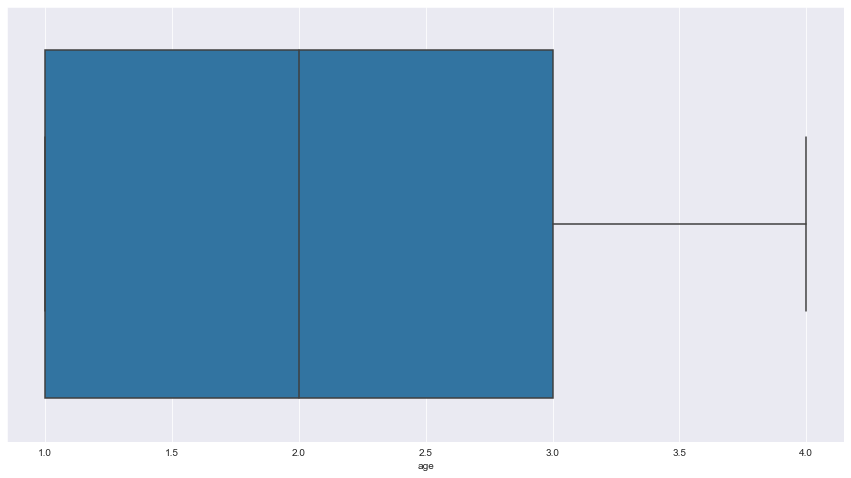

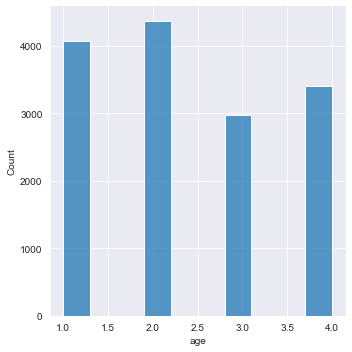

In [6]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['age'])
sns.displot(df.age, bins = 10, kde = False);

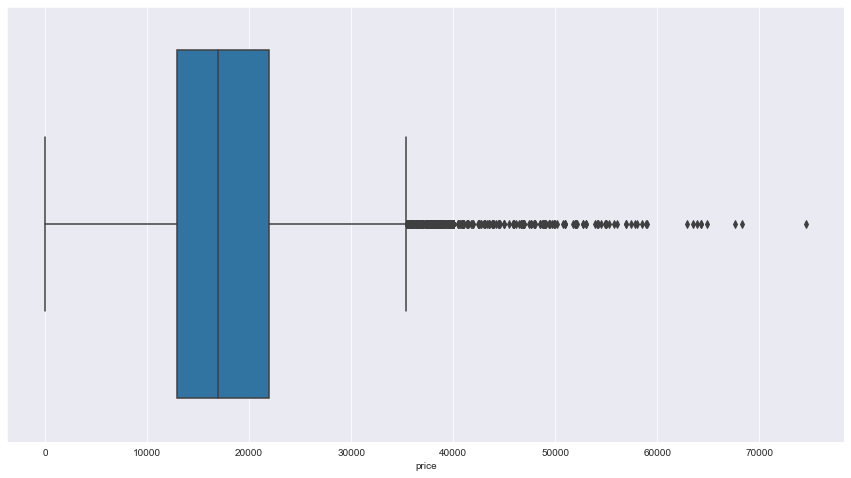

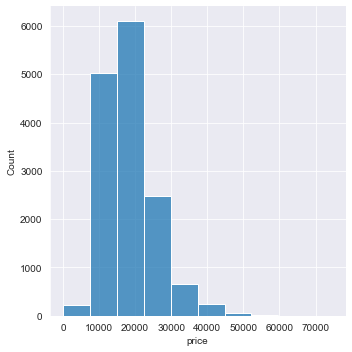

In [7]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['price'])
sns.displot(df.price, bins = 10, kde = False);

In [8]:
df['price_log'] = np.log(df['price'])

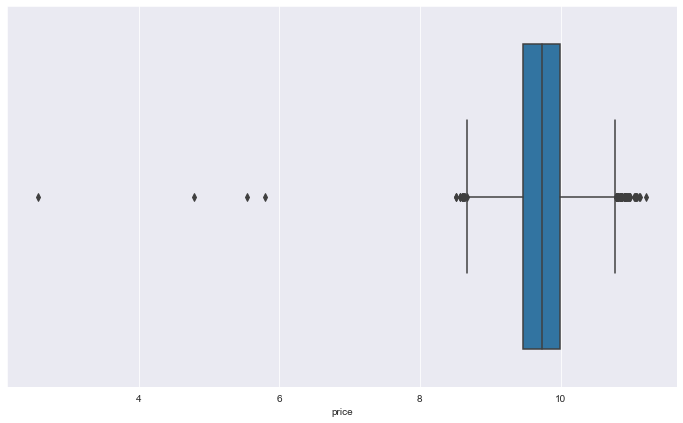

In [9]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.price));

In [10]:
Q1 = df.price_log.quantile(0.25)
Q3 = df.price_log.quantile(0.75)

In [11]:
IQR = Q3 - Q1

In [12]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [13]:
df.loc[(df.price_log > upper_lim)]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,...,entertainment_&_media,extras,safety_&_security,gears,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat,price_log
3367,Audi,A3,2.0,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,64900,35000.0,294.0,Benzine,Used,...,Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,Cloth,8.3,3.0,6.6,VAT deductible,11.080603
3370,Audi,A3,1.0,RS 3 SPB Quattro S Tronic,Sedans,62900,700.0,294.0,Benzine,Used,...,"Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.0,Cloth,8.3,3.0,6.6,VAT deductible,11.049301
3372,Audi,A3,2.0,RS 3 SPB 2.5 TFSI quattro S tronic ! FAST VOLL,Sedans,56900,5200.0,294.0,Benzine,Used,...,"Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,Full leather,8.3,3.0,6.6,VAT deductible,10.949051
3373,Audi,A3,2.0,RS 3 SPB 2.5 TFSI quattro S tronic,Sedans,58500,10000.0,294.0,Benzine,Used,...,Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,Cloth,8.3,3.0,6.6,VAT deductible,10.976782
3374,Audi,A3,2.0,"S3 SB 2,0 TFSI - Matrix - Pano - VC - Garantie",Sedans,58990,7500.0,228.0,Benzine,Used,...,"Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,Full leather,6.5,3.0,6.6,VAT deductible,10.985123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,Renault,Espace,1.0,INITIALE Paris BLUE dCi 200 EDC ABS NAVI,Van,48800,15.0,147.0,Diesel,New,...,"Bluetooth,Hands-free equipment,MP3,USB","Alloy wheels,Sport suspension,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",6.0,Full leather,5.3,6.2,4.7,VAT deductible,10.795486
14779,Renault,Espace,1.0,1.8 TCe Intens 5p.,Van,48765,11.0,165.0,Benzine,New,...,"Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",9.0,Part leather,7.4,9.2,6.3,VAT deductible,10.794768
14780,Renault,Espace,1.0,Initiale Paris ENERGY TCe 200 EDC LED,Van,48720,1506.0,147.0,Diesel,Demonstration,...,"Digital radio,On-board computer,Sound system",Touch screen,"ABS,Blind spot monitor,Central door lock,Dayti...",6.0,Full leather,5.7,6.0,5.3,VAT deductible,10.793845
14781,Renault,Espace,1.0,Initiale Paris 2.0 BLUE dCi 200 EDC 7-Sitzer L...,Van,48490,5.0,147.0,Diesel,Pre-registered,...,"Bluetooth,Digital radio,Hands-free equipment,M...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,Full leather,5.3,6.2,4.7,VAT deductible,10.789113


In [14]:
df.loc[(df.price_log < lower_lim)]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,...,entertainment_&_media,extras,safety_&_security,gears,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat,price_log
3034,Audi,A3,2.0,2.0 TDI Sportback quattro design,Station wagon,5555,5558.0,110.0,Diesel,Used,...,"Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Voice Control","ABS,Central door lock with remote control,Driv...",6.0,Cloth,4.8,5.7,4.3,VAT deductible,8.622454
5700,Opel,Astra,2.0,1.6 D (CDTI) Start/Stop Sports Tourer Business,Station wagon,255,5563.0,100.0,Diesel,Used,...,"Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,Cloth,3.8,4.5,3.4,VAT deductible,5.541264
8065,Opel,Corsa,2.0,1.4 (ecoFLEX) Start/Stop Innovation,Sedans,13,123.0,66.0,Benzine,Used,...,"Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,Cloth,5.6,6.8,4.9,VAT deductible,2.564949
8288,Opel,Corsa,4.0,1.3 CDTI 3 porte n-Joy,Sedans,5499,143000.0,55.0,Diesel,Used,...,"Bluetooth,CD player,MP3,On-board computer,Radi...","Alloy wheels,Trailer hitch","ABS,Alarm system,Central door lock,Central doo...",5.0,Cloth,3.8,4.6,3.3,VAT deductible,8.612322
8289,Opel,Corsa,4.0,1.3 CDTI Van ECOFLEX 2 POSTI ++AZIENDALE++,Transporter,5600,112413.0,55.0,Diesel,Used,...,NaN,NaN,"ABS,Central door lock,Driver-side airbag,Elect...",5.0,Cloth,3.8,4.6,3.3,VAT deductible,8.630522
8290,Opel,Corsa,4.0,1.3CDTI Expression 75,Compact,5490,157000.0,55.0,Diesel,Used,...,NaN,NaN,NaN,5.0,Cloth,3.0,4.0,3.0,VAT deductible,8.610684
8291,Opel,Corsa,4.0,Van 1.3CDTI Expression 75,Transporter,5450,73000.0,55.0,Diesel,Used,...,"Bluetooth,Radio,USB",NaN,"ABS,Central door lock,Central door lock with r...",5.0,Cloth,3.8,4.5,3.3,VAT deductible,8.603371
8292,Opel,Corsa,4.0,E Edition ecoFlex Klima PDC + Winterräder,Compact,5300,173021.0,55.0,Diesel,Used,...,"CD player,On-board computer",NaN,"ABS,Central door lock,Daytime running lights,D...",5.0,Cloth,3.9,4.7,3.4,VAT deductible,8.575462
8293,Opel,Corsa,4.0,Color Edition,Compact,4990,79000.0,66.0,Benzine,Used,...,"Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",5.0,Cloth,5.2,6.6,4.3,VAT deductible,8.515191
8294,Opel,Corsa,4.0,Van 1.3CDTI Expression 75,Transporter,5250,80000.0,55.0,Diesel,Used,...,"Bluetooth,Radio,USB",NaN,"ABS,Central door lock,Central door lock with r...",5.0,Cloth,3.8,4.5,3.3,VAT deductible,8.565983


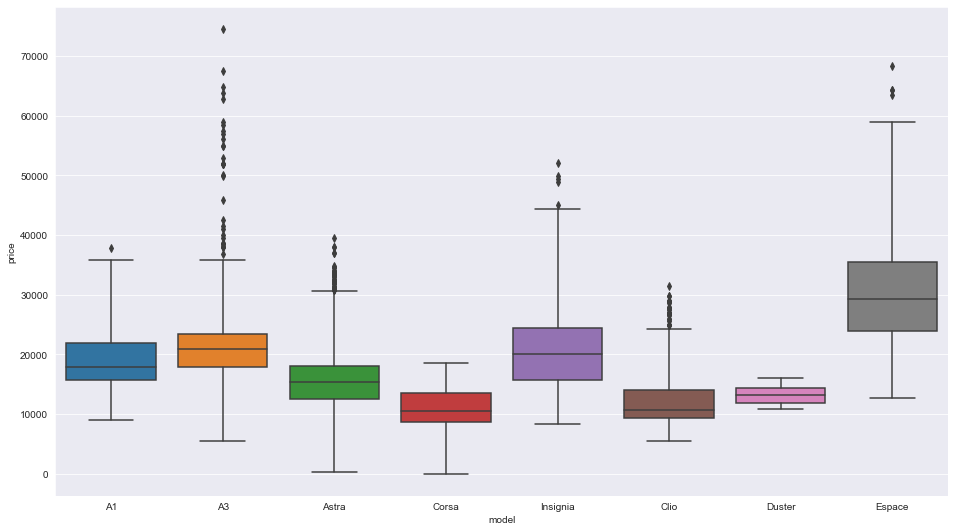

In [15]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='model', y='price', data=df, whis=2.3);

In [16]:
df['price'].sort_values()

8065        13
8296       120
5700       255
8297       331
8295      4950
         ...  
14731    64332
3367     64900
3429     67600
14729    68320
3428     74600
Name: price, Length: 14819, dtype: int64

In [17]:
df.drop(index=[8065,8296,5700,8297], axis=0, inplace=True)

In [18]:
#outlier_index_up = df.loc[(df.price_log > upper_lim)].index
#outlier_index_up

In [19]:
#outlier_index_low = df.loc[(df.price_log < lower_lim)].index
#outlier_index_low

In [20]:
df.shape

(14815, 32)

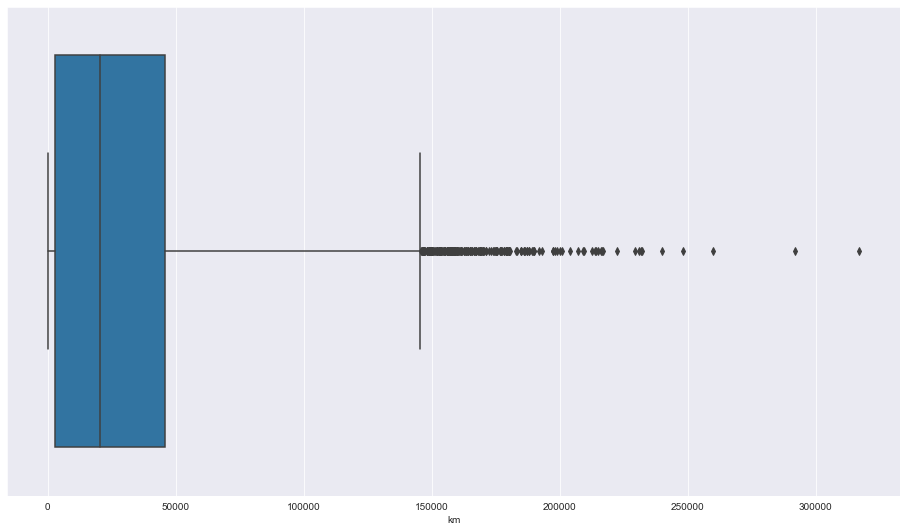

In [21]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='km', data=df, whis=2.3);

In [22]:
# km deki outlier lar kontrol edilecek

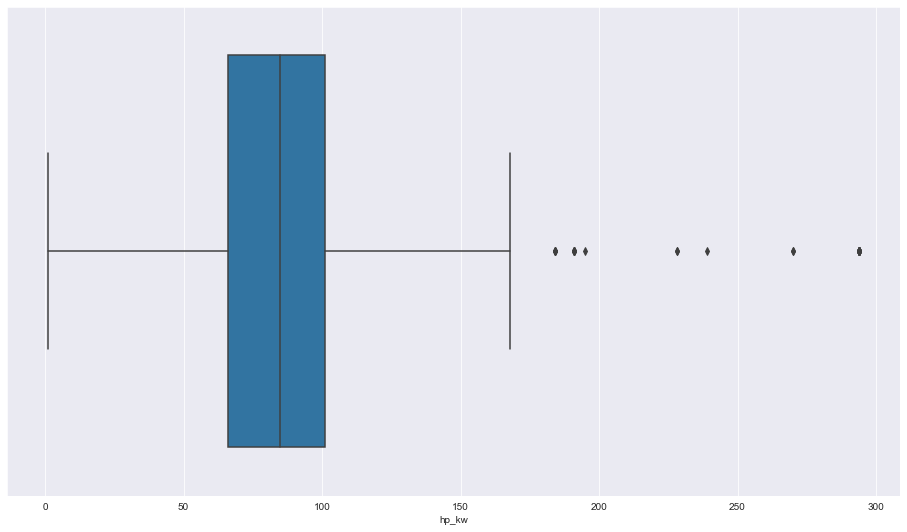

In [23]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='hp_kw', data=df, whis=2.3);

In [24]:
df.loc[(df['hp_kw'] < 40), 'hp_kw'] = np.nan

In [25]:
df['hp_kw'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['hp_kw'].transform(lambda x: x.mode()[0]), inplace=True)

In [26]:
df[(df['hp_kw'] < 40)]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,...,entertainment_&_media,extras,safety_&_security,gears,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat,price_log


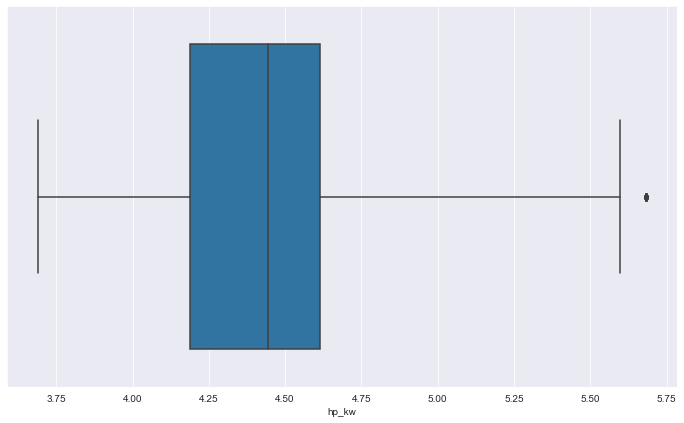

In [27]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.hp_kw), whis=2.5);

In [28]:
df.drop('price_log', axis= 1, inplace= True)

## displacement_in_cc

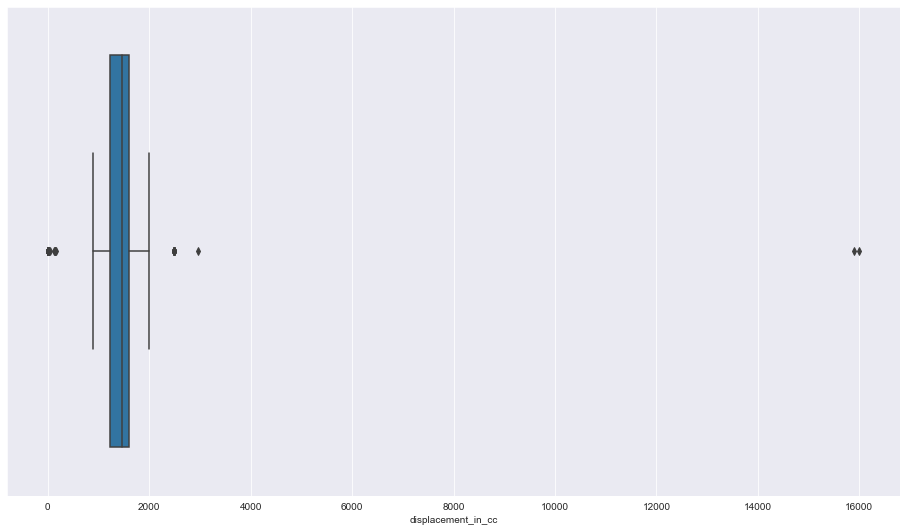

In [29]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='displacement_in_cc', data=df, whis=2.3);

In [30]:
df.sort_values(by=["displacement_in_cc"], ascending=False)["displacement_in_cc"].head(5)

10275    16000.0
6690     15898.0
10120     2967.0
3378      2480.0
3381      2480.0
Name: displacement_in_cc, dtype: float64

In [31]:
df.sort_values(by=["displacement_in_cc"], ascending=True)["displacement_in_cc"].head(55)

12027      1.0
12044      1.0
12052      1.0
12025      1.0
12076      1.0
12077      1.0
13373      1.0
13374      1.0
13376      1.0
13377      1.0
13367      1.0
13380      1.0
13378      1.0
13366      1.0
13338      1.0
13379      1.0
11722      1.0
11728      1.0
12063      1.0
11754      1.0
12019      1.0
12015      1.0
12012      1.0
12010      1.0
11998      1.0
12029      1.0
11739      1.0
11997      1.0
12983      1.0
11979      1.0
13372      1.0
11908      1.0
13371      1.0
11852      1.0
11808      1.0
11756      1.0
9914       2.0
13264      2.0
12991     54.0
9598     122.0
7318     139.0
7315     139.0
7316     139.0
7317     139.0
7607     140.0
14492    160.0
12755    890.0
13707    898.0
13339    898.0
13710    898.0
13342    898.0
13711    898.0
13712    898.0
13713    898.0
13341    898.0
Name: displacement_in_cc, dtype: float64

In [32]:
outlier_bool_list = df.displacement_in_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [33]:
df.loc[outlier_bool_list, "displacement_in_cc"] = np.nan

In [34]:
df.displacement_in_cc.isnull().sum()

48

In [35]:
df['displacement_in_cc'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['hp_kw'].transform(lambda x: x.mode()[0]), inplace=True)

In [36]:
df.displacement_in_cc.isnull().sum()

0

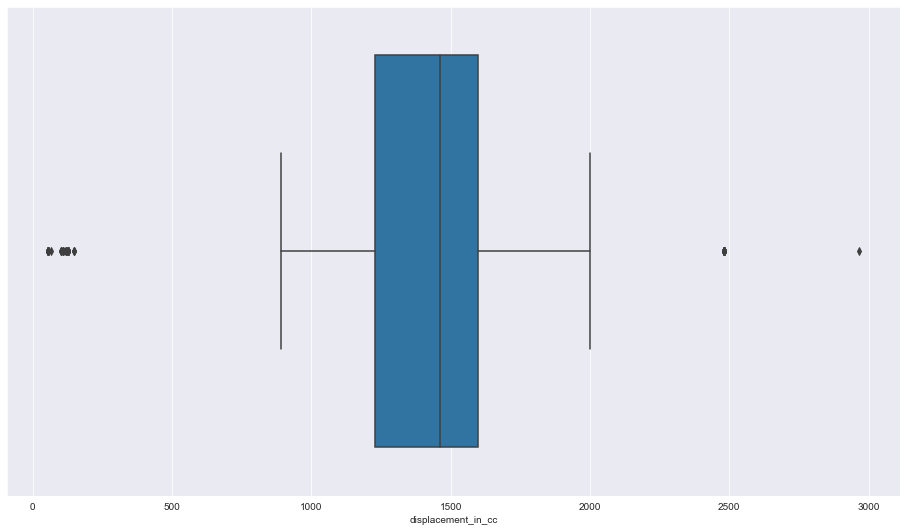

In [37]:
plt.figure(figsize = (16, 9))
sns.boxplot(x='displacement_in_cc', data=df, whis=2.3);

## weight

In [38]:
df.weight.describe()

count    14815.000000
mean      1342.960648
std        205.918147
min          1.000000
25%       1163.000000
50%       1308.000000
75%       1487.000000
max       2471.000000
Name: weight, dtype: float64

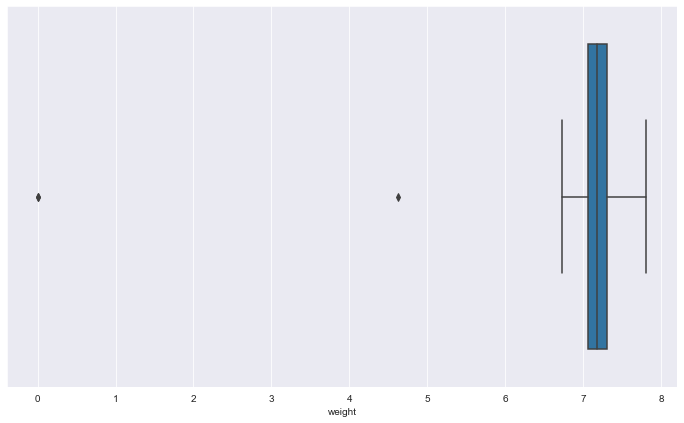

In [39]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.weight), whis=2.5);

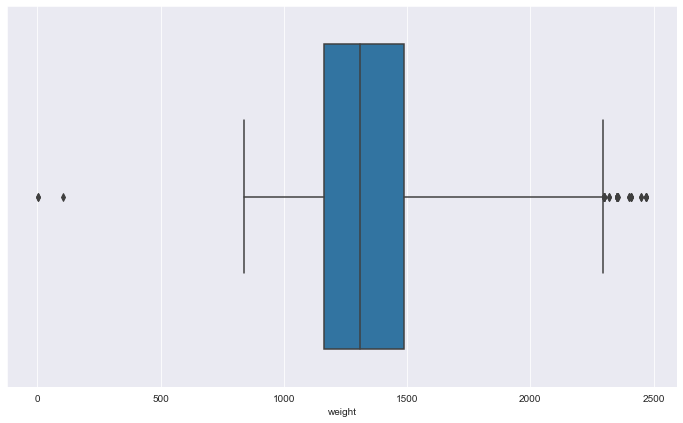

In [40]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = df.weight, whis=2.5);

In [41]:
df.weight.sort_values()

7829        1.0
12008       1.0
1071      102.0
8323      840.0
13365     900.0
          ...  
14176    2471.0
14587    2471.0
14209    2471.0
14134    2471.0
13954    2471.0
Name: weight, Length: 14815, dtype: float64

In [42]:
df.weight.sort_values(ascending= False)

13954    2471.0
14209    2471.0
14587    2471.0
14134    2471.0
14176    2471.0
          ...  
13365     900.0
8323      840.0
1071      102.0
7829        1.0
12008       1.0
Name: weight, Length: 14815, dtype: float64

In [43]:
df.loc[(df['weight'] > 1800) ,:]

,make,model,age,short_description,body_type,price,km,hp_kw,fuel,type,...,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,seat_cover,consumption_comb(l/100_km),consumption_city(l/100_km),consumption_country(l/100_km),vat
2489,Audi,A3,4.0,Sportback 2.0 TDI CD Attraction S-Tronic,Sedans,18500,99500.000000,110.0,Diesel,Used,...,"Air conditioning,Automatic climate control,Pow...",Radio,NaN,"ABS,Central door lock,Daytime running lights,D...",6.0,Cloth,4.5,5.3,4.0,VAT deductible
2534,Audi,A3,3.0,1.6 TDi S tronic GPS APS AIRCO BLUETOOTH,Sedans,17990,85449.000000,81.0,Diesel,Used,...,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,On-board computer,Radio","Alloy wheels,Catalytic Converter","ABS,Alarm system,Central door lock with remote...",7.0,Cloth,3.7,4.2,3.4,VAT deductible
2569,Audi,A3,4.0,Sportback 1.6 TDI CD S-Tronic Advanced 8,Sedans,17300,108300.000000,81.0,Diesel,Used,...,"Air conditioning,Automatic climate control,Cru...",Radio,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7.0,Cloth,4.0,4.5,3.7,VAT deductible
2576,Audi,A3,3.0,1.6 TDI Sportback S Tronic Business,Sedans,17900,35755.000000,81.0,Diesel,Used,...,"Air conditioning,Armrest,Cruise control,Leathe...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Roof rack,Voice Control","ABS,Central door lock,Driver-side airbag,Elect...",7.0,Cloth,3.8,4.3,3.5,VAT deductible
2580,Audi,A3,4.0,SPB 1.6 TDI clean diesel S tronic Business,Sedans,17900,47812.000000,81.0,Diesel,Used,...,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",7.0,Cloth,3.8,4.3,3.5,VAT deductible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14790,Renault,Espace,1.0,BLUE dCi 200 EDC LIMITED,Station wagon,42490,1581.977876,147.0,Diesel,New,...,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,Cloth,5.7,6.0,5.3,VAT deductible
14795,Renault,Espace,1.0,dCi 200 EDC INITIALE PARIS,Station wagon,42490,16500.000000,147.0,Diesel,Demonstration,...,"Cruise control,Electrically adjustable seats,E...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,Full leather,5.3,6.2,4.7,VAT deductible
14799,Renault,Espace,1.0,2.0 Blue dCi 200 Initiale Paris EDC (EU6.2),Van,41395,5000.000000,147.0,Diesel,Demonstration,...,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Adaptive Cruise Control,Blind spot monitor...",6.0,Full leather,5.3,6.2,4.7,VAT deductible
14800,Renault,Espace,1.0,ESPACE INITIALE PARIS TCe 225 EDC GPF,Van,41480,8500.000000,165.0,Benzine,Demonstration,...,"Air conditioning,Automatic climate control,Cru...",Sound system,Alloy wheels,"ABS,Adaptive headlights,Blind spot monitor,Cen...",7.0,Full leather,7.4,9.6,6.0,VAT deductible


In [44]:
df.loc[(df['model'] == 'Espace') , 'weight'].describe()

count     910.000000
mean     1727.652747
std       121.711214
min      1515.000000
25%      1685.000000
50%      1734.000000
75%      1734.000000
max      2471.000000
Name: weight, dtype: float64

In [45]:
df.loc[(df['weight'] < 500) | (df['weight'] > 1800 ) , 'weight'] = np.nan

In [46]:
df.weight.isnull().sum()

313

In [47]:
df['weight'].fillna(df.groupby(['make', 'model', 'age'])['weight'].transform(lambda x: x.mode()[0]), inplace=True)

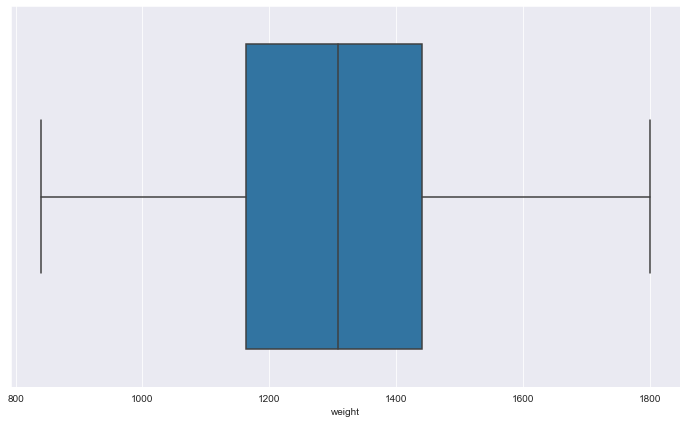

In [48]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = df.weight);

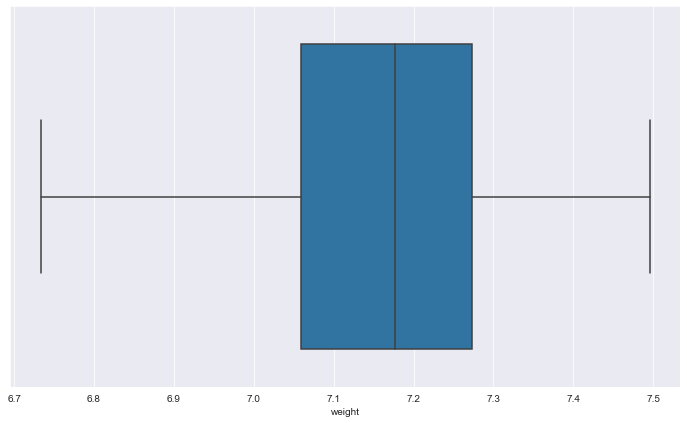

In [49]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.weight), whis=2.5);

## emission_class

In [50]:
df.emission_class.value_counts()

Euro 6          12250
Euro 6d-TEMP     2257
Euro 6c           126
Euro 5             78
Euro 6d            62
Euro 4             42
Name: emission_class, dtype: int64

In [51]:
df.replace({"emission_class" : {"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}}, regex=True, inplace=True)

In [52]:
df.emission_class.value_counts()

Euro 6    14695
Euro 5       78
Euro 4       42
Name: emission_class, dtype: int64

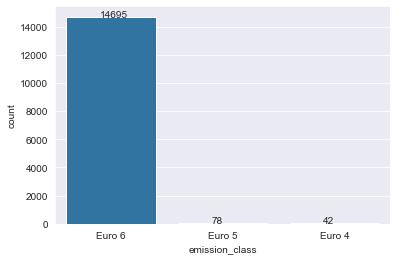

In [53]:
fig, ax = plt.subplots()
ax = sns.countplot(df.emission_class);

for p in ax.patches :
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.9))

## body_color

In [54]:
df.body_color.value_counts()

Black     3707
Grey      3505
White     3228
Silver    1567
Blue      1360
Red        860
Brown      266
Green      146
Beige       98
Yellow      51
Violet      18
Bronze       6
Orange       3
Name: body_color, dtype: int64

In [55]:
df.body_color.replace(['Bronze', 'Orange', 'Gold', 'Violet', 'Yellow', 'Beige', 'Green', 'Brown', 'Red', 'Blue'], 'unpopular', inplace=True)
df.body_color.replace(['Black', 'Grey', 'White', 'Silver'], 'popular', inplace=True)


In [56]:
df.body_color.value_counts()

popular      12007
unpopular     2808
Name: body_color, dtype: int64

In [57]:
# df.drop('body_color', axis= 1, inplace= True)

## paint_type

In [58]:
df.paint_type.value_counts()

Metallic       14461
Uni/basic        348
Perl effect        6
Name: paint_type, dtype: int64

In [59]:
df.paint_type.replace('Perl effect', np.nan, inplace=True)

In [60]:
df['paint_type'].fillna(df.groupby(['make', 'model'])['paint_type'].transform(lambda x: x.mode()[0]), inplace=True)

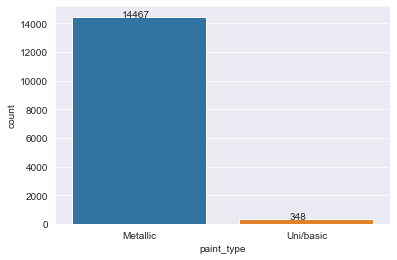

In [61]:
fig, ax = plt.subplots()
ax = sns.countplot(df.paint_type);

for p in ax.patches :
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.9))

## nr_of_doors

In [62]:
df.nr_of_doors.value_counts()

5.0    10989
4.0     2855
3.0      775
2.0      194
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [63]:
df.nr_of_doors.sort_values()

12868    1.0
1347     2.0
7954     2.0
526      2.0
1066     2.0
        ... 
5757     5.0
5758     5.0
5748     5.0
14818    5.0
14150    7.0
Name: nr_of_doors, Length: 14815, dtype: float64

In [64]:
df.loc[[12864,14144], 'nr_of_doors']= np.nan

In [65]:
df['nr_of_doors'].fillna(df.groupby(['make', 'model', 'body_type'])['nr_of_doors'].transform(lambda x: x.mode()[0]), inplace=True)

In [66]:
df['nr_of_doors'].isna().sum()

0

In [67]:
df.nr_of_doors.value_counts(dropna= False)

5.0    10989
4.0     2855
3.0      775
2.0      194
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

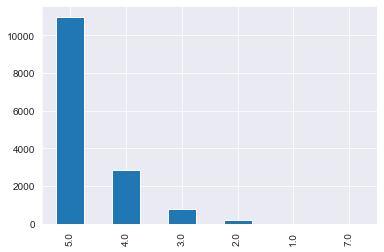

In [68]:
df.nr_of_doors.value_counts().plot.bar();

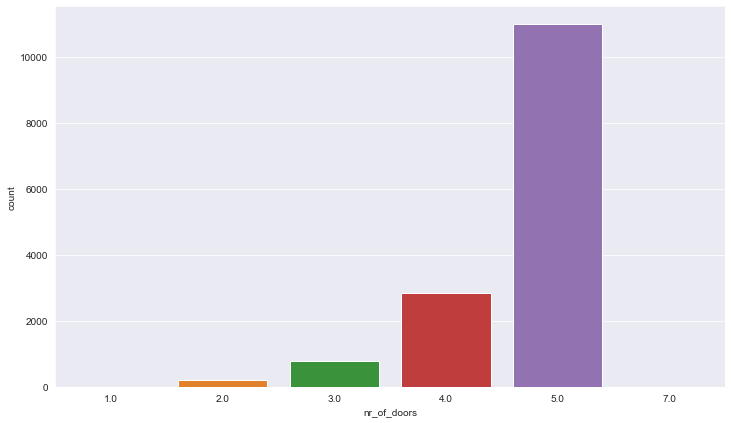

In [69]:
plt.figure(figsize = (12, 7))
sns.countplot(df.nr_of_doors);

## nr_of_seats

In [70]:
df.nr_of_seats.value_counts()

5.0    13316
4.0     1081
7.0      316
2.0       99
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [71]:
df.nr_of_seats.replace([3, 6], np.nan, inplace=True)

In [72]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13316
4.0     1081
7.0      316
2.0       99
NaN        3
Name: nr_of_seats, dtype: int64

In [73]:
df['nr_of_seats'].fillna(df.groupby(['make', 'model', 'body_type'])['nr_of_seats'].transform(lambda x: x.mode()[0]), inplace=True)

In [74]:
df.nr_of_seats.value_counts(dropna=False)

5.0    13319
4.0     1081
7.0      316
2.0       99
Name: nr_of_seats, dtype: int64

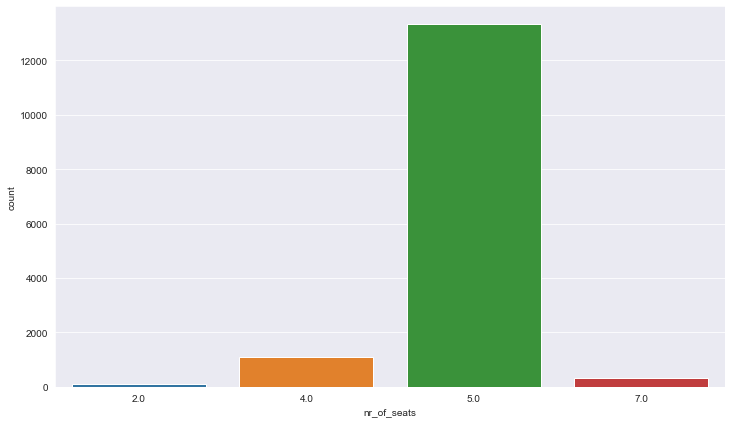

In [75]:
plt.figure(figsize = (12, 7))
sns.countplot(df.nr_of_seats);

## drive_chain

In [76]:
df.drive_chain.value_counts(dropna = False)

front    14627
4WD        184
rear         4
Name: drive_chain, dtype: int64

In [77]:
df["drive_chain"].replace('rear', 'front', inplace=True)

In [78]:
df.drive_chain.value_counts(dropna = False)

front    14631
4WD        184
Name: drive_chain, dtype: int64

## gears

In [79]:
df.gears.value_counts(dropna = False)

6.0     7764
5.0     4084
7.0     2737
8.0      216
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [80]:
df["gears"].replace([1, 2, 3, 4, 9, 50], np.nan, inplace=True)

In [81]:
df.gears.value_counts(dropna = False)

6.0    7764
5.0    4084
7.0    2737
8.0     216
NaN      14
Name: gears, dtype: int64

In [82]:
df['gears'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['gears'].transform(lambda x: x.mode()[0]), inplace=True)

In [83]:
df.gears.value_counts(dropna = False)


6.0    7768
5.0    4087
7.0    2744
8.0     216
Name: gears, dtype: int64

In [84]:
plt.figure(figsize = (15, 8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

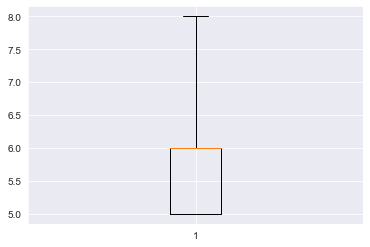

In [85]:
plt.boxplot(df.gears, whis=2.5);

## seat_cover

In [86]:
df['seat_cover'].value_counts(dropna=False)

Cloth           11988
Part leather     1390
Full leather     1320
Velour             60
alcantara          57
Name: seat_cover, dtype: int64

In [87]:
df['seat_cover'].replace(['Velour', 'alcantara'], 'Cloth', inplace = True)

In [88]:
df['seat_cover'].value_counts(dropna=False)

Cloth           12105
Part leather     1390
Full leather     1320
Name: seat_cover, dtype: int64

## consumption

In [89]:
df['consumption_comb(l/100_km)'].value_counts(dropna=False)

5.0     1649
4.0     1108
3.9      954
5.4      794
6.0      704
4.7      685
4.8      622
5.3      610
4.4      595
3.8      587
5.6      551
4.5      551
4.2      507
3.7      480
5.2      403
4.6      381
3.3      328
4.9      319
5.5      308
3.5      307
5.7      296
6.2      289
4.3      272
5.9      254
3.6      194
6.8      132
6.3      128
5.8      128
6.6      119
3.4      104
3.0       74
6.4       64
7.4       58
7.0       47
6.7       30
8.3       27
3.2       26
8.4       26
6.5       24
6.9       20
7.6       14
8.7       11
8.0        7
7.2        6
7.8        5
8.6        3
38.0       2
7.3        2
7.5        1
9.0        1
7.9        1
55.0       1
54.0       1
0.2        1
32.0       1
33.0       1
43.0       1
46.0       1
Name: consumption_comb(l/100_km), dtype: int64

In [90]:
df.loc[(df['consumption_comb(l/100_km)'] > 10), 'consumption_comb(l/100_km)'] = np.nan

In [91]:
df.loc[(df['consumption_comb(l/100_km)'] < 3), 'consumption_comb(l/100_km)'] = np.nan

In [92]:
df['consumption_comb(l/100_km)'].fillna(df.groupby(['make', 'model', 'age', 'fuel'])['consumption_comb(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [93]:
df['consumption_city(l/100_km)'].value_counts(dropna=False)

5.0     1533
4.0      788
4.5      722
5.8      635
5.4      625
        ... 
8.8        2
43.0       2
66.0       1
64.0       1
9.7        1
Name: consumption_city(l/100_km), Length: 69, dtype: int64

In [94]:
df.loc[(df['consumption_city(l/100_km)'] > 12), 'consumption_city(l/100_km)'] = np.nan

In [95]:
df.loc[(df['consumption_city(l/100_km)'] < 3), 'consumption_city(l/100_km)'] = np.nan

In [96]:
df['consumption_city(l/100_km)'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['consumption_city(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [97]:
df['consumption_country(l/100_km)'].value_counts(dropna=False)

4.2     1369
3.7     1343
4.0     1304
4.5     1241
4.4      932
3.9      872
3.8      810
4.7      725
4.9      704
3.3      636
3.0      627
4.6      525
3.6      516
3.5      513
4.3      413
3.4      351
5.3      344
4.8      283
5.0      272
5.7      209
5.4      176
3.2      159
5.6      127
5.2       80
6.3       48
6.0       33
5.5       30
5.8       30
6.9       28
6.6       27
2.9       16
6.4       15
2.8        9
7.7        8
7.2        8
7.0        5
6.5        4
44.0       4
7.3        4
35.0       2
37.0       2
6.7        2
5.9        2
7.8        2
2.0        1
8.0        1
8.6        1
7.6        1
42.0       1
Name: consumption_country(l/100_km), dtype: int64

In [98]:
df.loc[(df['consumption_country(l/100_km)'] > 12), 'consumption_country(l/100_km)'] = np.nan

In [99]:
df.loc[(df['consumption_country(l/100_km)'] < 2.5), 'consumption_country(l/100_km)'] = np.nan

In [100]:
df['consumption_country(l/100_km)'].fillna(df.groupby(['make', 'model', 'age', 'fuel', 'body_type'])['consumption_country(l/100_km)'].transform(lambda x: x.mode()[0]), inplace=True)

In [101]:
df['consumption_avg'] = (df['consumption_country(l/100_km)'] + df['consumption_city(l/100_km)'] + df['consumption_comb(l/100_km)']) / 3

In [102]:
df['consumption_avg'].sort_values().value_counts(dropna = False)

3.866667    666
4.700000    437
4.666667    434
5.166667    410
4.066667    378
           ... 
6.933333      1
7.233333      1
4.833333      1
7.133333      1
6.433333      1
Name: consumption_avg, Length: 189, dtype: int64

In [103]:
df.drop(['consumption_country(l/100_km)', 'consumption_city(l/100_km)', 'consumption_comb(l/100_km)'], axis=1, inplace = True)

## vat

In [104]:
df['vat'].value_counts(dropna=False)

VAT deductible      14360
Price negotiable      455
Name: vat, dtype: int64

In [105]:
df.shape

(14815, 29)

In [106]:
df.columns

Index(['make', 'model', 'age', 'short_description', 'body_type', 'price', 'km',
       'hp_kw', 'fuel', 'type', 'previous_owners', 'gearing_type',
       'displacement_in_cc', 'cylinders', 'weight', 'emission_class',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats', 'drive_chain',
       'comfort_&_convenience', 'entertainment_&_media', 'extras',
       'safety_&_security', 'gears', 'seat_cover', 'vat', 'consumption_avg'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14815 entries, 0 to 14818
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   14815 non-null  object 
 1   model                  14815 non-null  object 
 2   age                    14815 non-null  float64
 3   short_description      14771 non-null  object 
 4   body_type              14815 non-null  object 
 5   price                  14815 non-null  int64  
 6   km                     14815 non-null  float64
 7   hp_kw                  14815 non-null  float64
 8   fuel                   14815 non-null  object 
 9   type                   14815 non-null  object 
 10  previous_owners        14815 non-null  float64
 11  gearing_type           14815 non-null  object 
 12  displacement_in_cc     14815 non-null  float64
 13  cylinders              14815 non-null  float64
 14  weight                 14815 non-null  float64
 15  em

In [108]:
numeric_col = "price,km,gears,previous_owners,consumption_avg,displacement_in_cc,age,hp_kw,weight,cylinders,nr_of_doors,nr_of_seats".split(",")

In [109]:
df_num = df[numeric_col]

In [110]:
df_num

,price,km,gears,previous_owners,consumption_avg,displacement_in_cc,age,hp_kw,weight,cylinders,nr_of_doors,nr_of_seats
0,15770,56013.000000,7.0,2.0,3.866667,1422.0,4.0,66.0,1220.0,3.0,5.0,5.0
1,14500,80000.000000,7.0,1.0,5.766667,1798.0,3.0,141.0,1255.0,4.0,3.0,4.0
2,14640,83450.000000,7.0,1.0,3.866667,1598.0,4.0,85.0,1135.0,3.0,4.0,4.0
3,14500,73000.000000,6.0,1.0,3.866667,1422.0,4.0,66.0,1195.0,3.0,3.0,4.0
4,16790,16200.000000,7.0,1.0,4.133333,1422.0,4.0,66.0,1135.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14814,39950,1581.977876,6.0,1.0,5.400000,1997.0,1.0,147.0,1758.0,4.0,5.0,5.0
14815,39885,9900.000000,7.0,1.0,6.633333,1798.0,1.0,165.0,1708.0,4.0,5.0,5.0
14816,39875,15.000000,6.0,1.0,5.400000,1997.0,1.0,146.0,1685.0,4.0,5.0,7.0
14817,39700,10.000000,6.0,1.0,5.400000,1997.0,1.0,147.0,1758.0,4.0,5.0,7.0


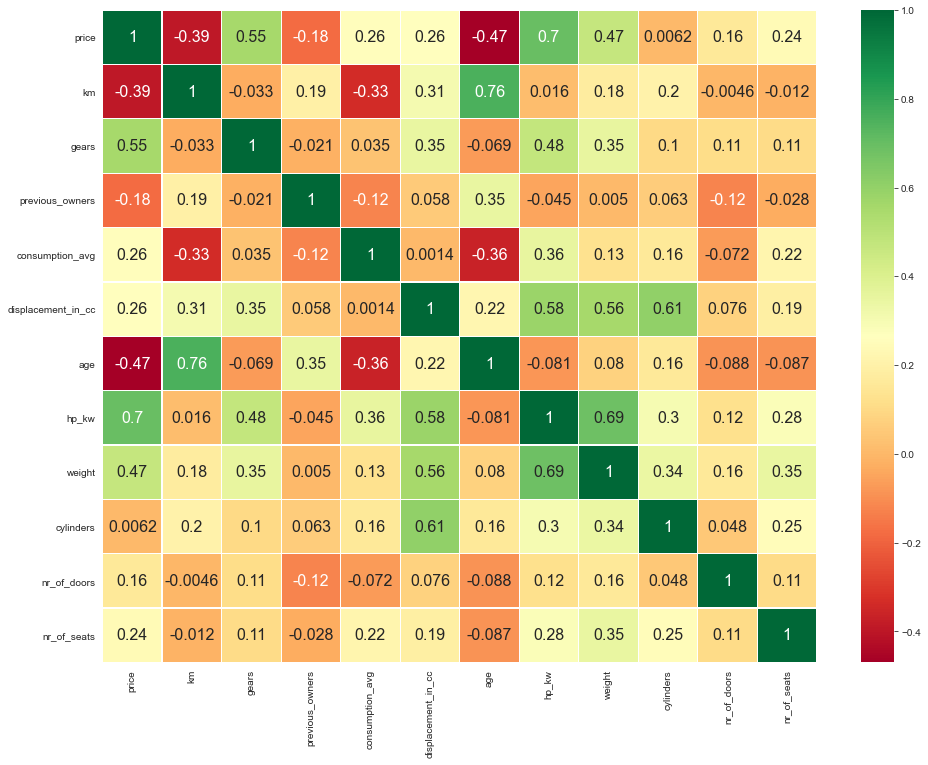

In [111]:
plt.figure(figsize=(16, 12))

sns.heatmap(df_num.corr(), annot=True, cmap="RdYlGn", linewidths=0.2, annot_kws={"size": 16});

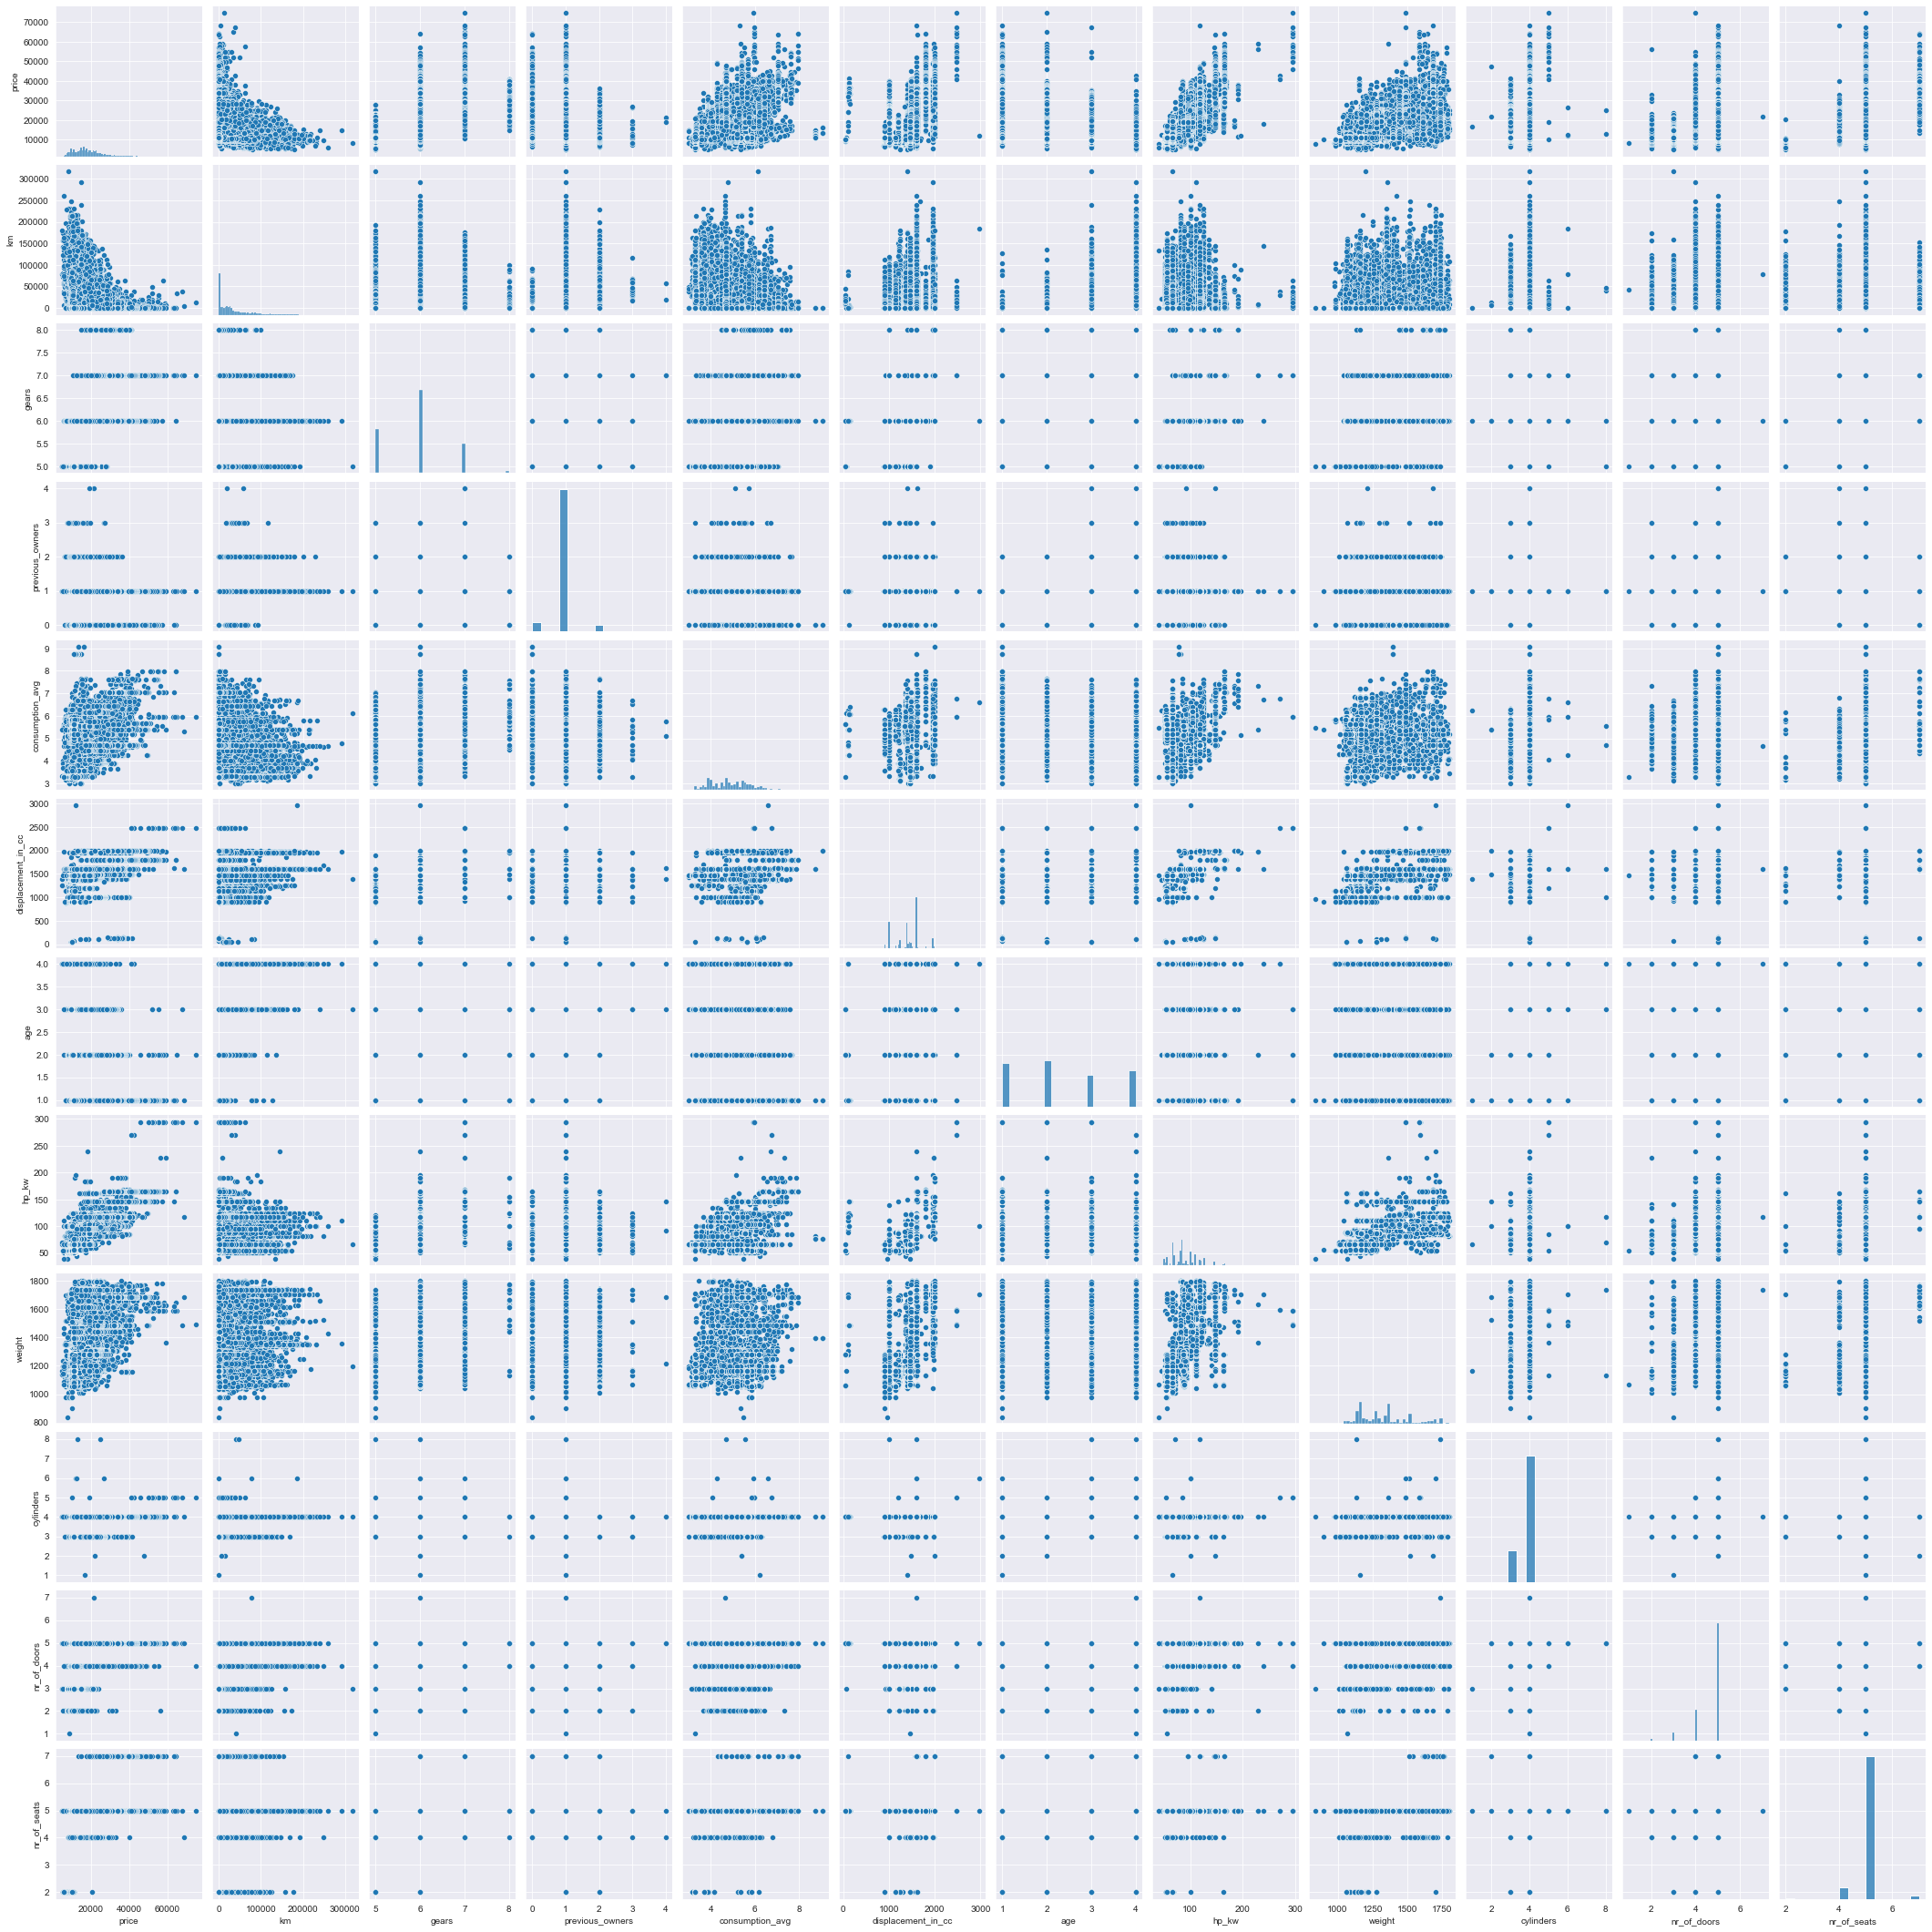

In [112]:
sns.pairplot(df_num, size=2.5)
plt.show()

In [113]:
df.make + '_' + df.model

0               Audi_A1
1               Audi_A1
2               Audi_A1
3               Audi_A1
4               Audi_A1
              ...      
14814    Renault_Espace
14815    Renault_Espace
14816    Renault_Espace
14817    Renault_Espace
14818    Renault_Espace
Length: 14815, dtype: object

In [114]:
df['make_model']= df.make + '_' + df.model

In [115]:
df.drop(['make', 'model'], axis= 1 , inplace= True)

In [116]:
df['make_model']

0               Audi_A1
1               Audi_A1
2               Audi_A1
3               Audi_A1
4               Audi_A1
              ...      
14814    Renault_Espace
14815    Renault_Espace
14816    Renault_Espace
14817    Renault_Espace
14818    Renault_Espace
Name: make_model, Length: 14815, dtype: object

In [117]:
df.shape

(14815, 28)

In [118]:
df.head()

,age,short_description,body_type,price,km,hp_kw,fuel,type,previous_owners,gearing_type,...,drive_chain,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,seat_cover,vat,consumption_avg,make_model
0,4.0,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,56013.0,66.0,Diesel,Used,2.0,Automatic,...,front,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Cloth,VAT deductible,3.866667,Audi_A1
1,3.0,1.8 TFSI sport,Sedans,14500,80000.0,141.0,Benzine,Used,1.0,Automatic,...,front,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.0,Cloth,Price negotiable,5.766667,Audi_A1
2,4.0,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,83450.0,85.0,Diesel,Used,1.0,Automatic,...,front,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.0,Cloth,VAT deductible,3.866667,Audi_A1
3,4.0,1.4 TDi Design S tronic,Sedans,14500,73000.0,66.0,Diesel,Used,1.0,Automatic,...,front,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.0,Cloth,VAT deductible,3.866667,Audi_A1
4,4.0,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,16200.0,66.0,Diesel,Used,1.0,Automatic,...,front,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.0,Cloth,VAT deductible,4.133333,Audi_A1


In [119]:
df.drop('short_description',axis=1,inplace=True)

In [122]:
df.to_csv("autoscout_not_dummy.csv", index=False)

# get_dummies

In [123]:
df1= df.copy()

In [124]:
df_extras = df1['extras'].str.get_dummies(sep=',').add_prefix('ex_')

In [125]:
df_extras.sum()

ex_Alloy wheels           10578
ex_Cab or rented Car        310
ex_Catalytic Converter     2175
ex_Handicapped enabled       52
ex_Right hand drive           3
ex_Roof rack               2547
ex_Shift paddles            454
ex_Ski bag                  244
ex_Sliding door               3
ex_Sport package           1129
ex_Sport seats             2934
ex_Sport suspension        1490
ex_Touch screen            3858
ex_Trailer hitch            639
ex_Tuned car                 13
ex_Voice Control           4082
ex_Winter tyres             246
dtype: int64

In [126]:
df_em = df1['entertainment_&_media'].str.get_dummies(sep=',').add_prefix('em_')

In [127]:
df_em.sum()

em_Bluetooth               10926
em_CD player                4541
em_Digital radio            2119
em_Hands-free equipment     8740
em_MP3                      5584
em_On-board computer       11197
em_Radio                   11306
em_Sound system             2077
em_Television                 35
em_USB                      7651
dtype: int64

In [128]:
df_cc = df1['comfort_&_convenience'].str.get_dummies(sep=',').add_prefix('cc_')

In [129]:
df_cc.sum()

cc_Air conditioning                       13451
cc_Air suspension                            62
cc_Armrest                                 6839
cc_Automatic climate control               8289
cc_Auxiliary heating                        234
cc_Cruise control                         10234
cc_Electric Starter                           1
cc_Electric tailgate                        972
cc_Electrical side mirrors                11260
cc_Electrically adjustable seats           1791
cc_Electrically heated windshield           925
cc_Heads-up display                         585
cc_Heated steering wheel                   2906
cc_Hill Holder                             6207
cc_Keyless central door lock               2316
cc_Leather seats                             48
cc_Leather steering wheel                  8915
cc_Light sensor                            7243
cc_Lumbar support                          3057
cc_Massage seats                            344
cc_Multi-function steering wheel        

In [130]:
df_ss = df1['safety_&_security'].str.get_dummies(sep=',').add_prefix('ss_')

In [131]:
df_ss.sum()

ss_ABS                                      13314
ss_Adaptive Cruise Control                   1252
ss_Adaptive headlights                       1943
ss_Alarm system                              1883
ss_Blind spot monitor                        1240
ss_Central door lock                        11936
ss_Central door lock with remote control     2382
ss_Daytime running lights                    9672
ss_Driver drowsiness detection                480
ss_Driver-side airbag                       13125
ss_Electronic stability control             12386
ss_Emergency brake assistant                 2998
ss_Emergency system                          1517
ss_Fog lights                                7818
ss_Head airbag                               2172
ss_Immobilizer                               9942
ss_Isofix                                   10987
ss_LED Daytime Running Lights                5175
ss_LED Headlights                            2835
ss_Lane departure warning system             2922


In [132]:
df = df1.join([df_cc,df_ss,df_extras,df_em])

In [133]:
df.drop(['comfort_&_convenience','entertainment_&_media', 'extras', 'safety_&_security'], axis=1, inplace=True)

In [134]:
df.shape

(14815, 117)

In [135]:
df_final = pd.get_dummies(df, drop_first=True)

In [136]:
df_final.shape

(14815, 136)

In [137]:
df_final.head().T

,0,1,2,3,4
age,4.0,3.0,4.0,4.0,4.0
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp_kw,66.0,141.0,85.0,66.0,66.0
previous_owners,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
make_model_Opel_Corsa,0.0,0.0,0.0,0.0,0.0
make_model_Opel_Insignia,0.0,0.0,0.0,0.0,0.0
make_model_Renault_Clio,0.0,0.0,0.0,0.0,0.0
make_model_Renault_Duster,0.0,0.0,0.0,0.0,0.0


In [138]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
df_final.corr().style.applymap(color_correlation)

In [144]:
df_final.tail()

,age,price,km,hp_kw,previous_owners,displacement_in_cc,cylinders,weight,nr_of_doors,nr_of_seats,...,seat_cover_Full leather,seat_cover_Part leather,vat_VAT deductible,make_model_Audi_A3,make_model_Opel_Astra,make_model_Opel_Corsa,make_model_Opel_Insignia,make_model_Renault_Clio,make_model_Renault_Duster,make_model_Renault_Espace
14814,1.0,39950,1581.977876,147.0,1.0,1997.0,4.0,1758.0,5.0,5.0,...,1,0,1,0,0,0,0,0,0,1
14815,1.0,39885,9900.000000,165.0,1.0,1798.0,4.0,1708.0,5.0,5.0,...,0,0,1,0,0,0,0,0,0,1
14816,1.0,39875,15.000000,146.0,1.0,1997.0,4.0,1685.0,5.0,7.0,...,1,0,1,0,0,0,0,0,0,1
14817,1.0,39700,10.000000,147.0,1.0,1997.0,4.0,1758.0,5.0,7.0,...,0,1,1,0,0,0,0,0,0,1
14818,1.0,40999,1581.977876,165.0,1.0,1798.0,4.0,1685.0,5.0,5.0,...,1,0,1,0,0,0,0,0,0,1


In [145]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14815 entries, 0 to 14818
Columns: 136 entries, age to make_model_Renault_Espace
dtypes: float64(11), int64(95), uint8(30)
memory usage: 13.0 MB


In [146]:
df_final.reset_index(drop=True, inplace=True)

In [147]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14815 entries, 0 to 14814
Columns: 136 entries, age to make_model_Renault_Espace
dtypes: float64(11), int64(95), uint8(30)
memory usage: 12.4 MB


In [148]:
df_final.to_csv("final_auto_scout.csv", index=False)